<a href="https://colab.research.google.com/github/julianpietsch/biophysics2025/blob/main/bistable_positive_feedback.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bistability in a two-step model for a gene with positive feedback

With $y = [\mathrm{mRNA}]$ and $x = [\mathrm{Protein}]$ we get the following system of ODEs:

\begin{align}
\frac{dy}{dt} &= \frac{x^2}{1+x^2} - by \\
\frac{dx}{dt} &= y - ax
\end{align}

where $a$ and $b$ set the time-scale of decay for each species.

In [1]:
import numpy as np
from matplotlib import pyplot as plt

Plot the nullclines

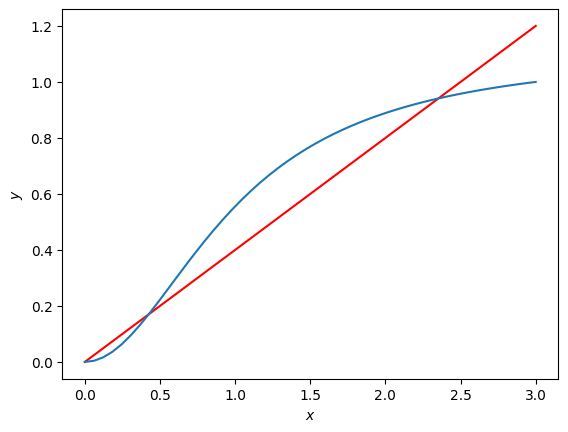

In [2]:
params = dict(a=0.4, b=0.9)

def x_nullcline(x, a, b):
  return a * x

def y_nullcline(x, a, b):
  return x**2 / b / (1 + x**2)

x = np.linspace(0, 3)
plt.plot(x, x_nullcline(x, **params), c='r')
plt.plot(x, y_nullcline(x, **params))
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

Plot the phase portrait and nullclines together:

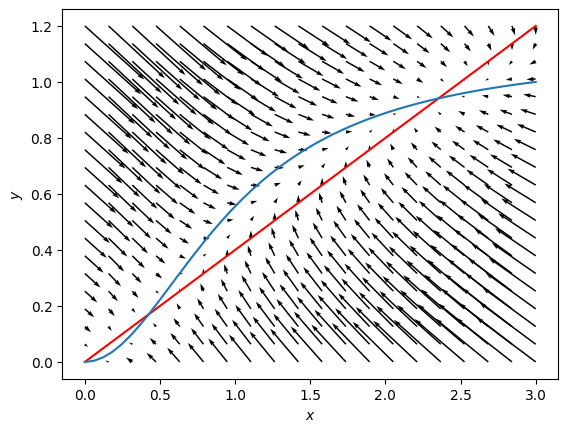

In [3]:
def xderiv(x, y, a, b):
  return y - a * x

def yderiv(x, y, a, b):
  return x**2 / (1 + x**2) - b*y

x, y = np.meshgrid(np.linspace(0, 3, 20), np.linspace(0, 1.2, 20))
plt.quiver(x, y, xderiv(x, y, **params), yderiv(x, y, **params), scale=10)
x = np.linspace(0, 3)
plt.plot(x, x_nullcline(x, **params), c='r')
plt.plot(x, y_nullcline(x, **params))
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

Plot the bifurcation diagram over the parameter $a$ by writing $a$ in terms of the fixed point solutions. Determine the point of bifurcation from the maximum of that function.

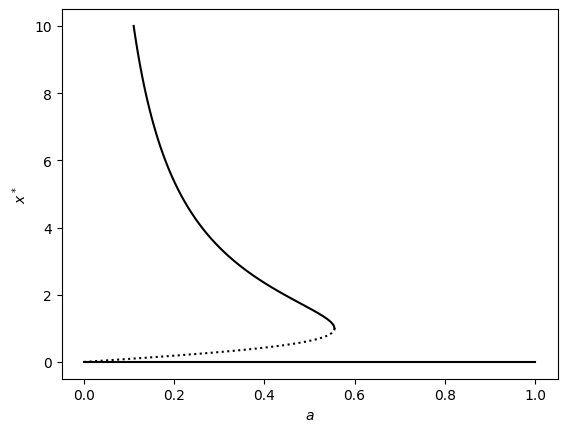

In [4]:
def bifurcation(x, b):
  return x / b / (1 + x**2)

fp_max = 1

# Show the unstable fixed points using dotted lines
fp_unstable = np.linspace(0, fp_max)
plt.plot(bifurcation(fp_unstable, params['b']), fp_unstable, c='k', ls=':')

# Show the the stable fixed points using solid lines
fp_stable = np.linspace(fp_max, 10, 100)
plt.plot(bifurcation(fp_stable, params['b']), fp_stable, c='k')

# Zero is also a fixed point for all $a$
a = np.linspace(0, 1)
plt.plot(a, np.zeros_like(a), c='k')

plt.xlabel('$a$')
plt.ylabel('$x^*$')
plt.show()